**Réaliser par : RABIE EL HAKOUNI**  
**MASTER SSI**

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [214]:
from collections import defaultdict
  
results = defaultdict(list)
results_rfe = defaultdict(list)

**1) duration:** Durée de la connexion  
**2) protocol_type:** Protocole utilisé dans la connexion  
**3) service :** Service réseau de destination utilisé  
**4) flag:** État de la connexion – Normal ou Erreur  
**5) src_bytes:** Nombre d'octets de données transférés de la source à la destination en une seule connexion  
**6) dst_bytes:** Nombre d'octets de données transférés de la destination à la source en une seule connexion  
**7) land:** si les adresses IP source et destination et les numéros de port sont égaux alors, cette variable prend la valeur 1 sinon 0  
**8) wrong_fragment:**Total number of wrong fragments in this connection  
**9) urgent:** Nombre de paquets urgents dans cette connexion. Les paquets urgents sont des paquets avec le bit urgent activé  
**10) hot:** Nombre d'indicateurs "hot" dans le contenu tels que : entrer dans un répertoire système, créer des programmes et exécuter des programmes  
**11) num_failed_logins:** Nombre de tentatives de connexion infructueuses  
**12) logged_in:** Statut de connexion : 1 si connecté avec succès , 0 sinon 
**13+num_compromised:** Nombre de conditions compromises  
**14) root_shell:** 1 si le shell root est obtenu ; 0 sinon  
**15) su_attempted:** 1 if "su root" command attempted or used; 0 otherwise  
**16) num_root:** Nombre d'accès "root" ou nombre d'opérations effectuées en tant que root dans la connexion  
**17) num_file_creations:** Nombre d'opérations de création de fichiers dans la connexion  
**18) num_shells:** Nombre d'invites du shell  
**19) num_access_files:** Nombre d'opérations sur les fichiers de contrôle d'accès    
**20) num_outbound_cmds:** Nombre de commandes sortantes dans une session ftp  
**21) is_host_login**: 1 si la connexion appartient à la liste "hot", c'est-à-dire root ou admin ; sinon 0  
**22) is_guest_login:** 1 si le login est un login "invité" ; 0 sinon    
**23) count:** Nombre de connexions au même hôte de destination que la connexion actuelle au cours des deux dernières secondes   
**24) srv_count:** Nombre de connexions au même service (numéro de port) que la connexion actuelle au cours des deux dernières secondes  
**25) serror_rate:** Le pourcentage de connexions ayant activé le drapeau (4) s0, s1, s2 ou s3, parmi les connexions agrégées en nombre (23)  
**26) srv_serror_rate:** Le pourcentage de connexions ayant activé le drapeau (4) s0, s1, s2 ou s3, parmi les connexions agrégées dans srv_count (24)  
**27) rerror_rate:** Le pourcentage de connexions qui ont activé le drapeau (4) REJ, parmi les connexions agrégées en nombre (23)  
**28) srv_rerror_rate:** Le pourcentage de connexions ayant activé le drapeau (4) REJ, parmi les connexions agrégées dans srv_count (24)  
**29) same_srv_rate:** Le pourcentage de connexions qui étaient au même service, parmi les connexions agrégées dans count (23)  
**30) diff_srv_rate:** Le pourcentage de connexions qui étaient à différents services, parmi les connexions agrégées en nombre (23)
**31) srv_diff_host_rate:** Le pourcentage de connexions vers différentes machines de destination parmi les connexions agrégées dans srv_count (24)  
**32) dst_host_count:** Nombre de connexions ayant la même adresse IP d'hôte de destination  
**33)dst_host_srv_count:** Nombre de connexions ayant le même numéro de port  
**34) dst_host_same_srv_rate:** Le pourcentage de connexions qui étaient au même service, parmi les connexions agrégées dans dst_host_count (32)    
**35) dst_host_diff_srv_rate:** Le pourcentage de connexions qui étaient à différents services, parmi les connexions agrégées dans dst_host_count (32)  
**36) dst_host_same_src_port_rate:** Le pourcentage de connexions qui étaient au même port source, parmi les connexions agrégées dans dst_host_srv_count (33)  
**37) dst_host_srv_diff_host_rate:** Le pourcentage de connexions vers différentes machines de destination, parmi les connexions agrégées dans dst_host_srv_count (33)    
**38) dst_host_serror_rate:** Le pourcentage de connexions ayant activé le drapeau (4) s0, s1, s2 ou s3, parmi les connexions agrégées dans dst_host_count (32)    
**39) dst_host_srv_serror_rate:** Le pourcentage de connexions qui ont activé le drapeau (4) s0, s1, s2 ou s3, parmi les connexions agrégées dans dst_host_srv_count (33)    
**40) dst_host_rerror_rate:**  Le pourcentage de connexions ayant activé le drapeau (4) REJ, parmi les connexions agrégées dans dst_host_count (32)  
**41) dst_host_srv_rerror_rate:** Le pourcentage de connexions ayant activé le drapeau (4) REJ, parmi les connexions agrégées dans dst_host_srv_c ount (33)   
**42) label:** normal ou attaque  

In [4]:
#définir les colonnes de dataset (train & test)
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [5]:
#load the dataset for training
data_train=pd.read_csv('NSL_KDD_Train.csv',header=None, names = col_names)
data_train.shape

(125973, 42)

In [6]:
#load the dataset for testing
data_test=pd.read_csv('NSL_KDD_Test.csv',header=None, names = col_names)
data_test.shape

(22544, 42)

In [7]:
#affichage du première ligne du dataset (train)
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
#affichage du première ligne du dataset (test)
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [9]:
#compter le nombre d'occurrences de chaque valeur unique dans la colonne label
print('Label distribution Train set:')
print(data_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(data_test['label'].value_counts())

Label distribution Train set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
por

In [10]:
data_train.isnull().values.any()

False

In [11]:
data_test.isnull().values.any()

False

In [12]:
data_train.duplicated().any()

False

In [13]:
data_test.duplicated().any()

False

##Data preprocessing




In [14]:
#le type de données de chaque colonne du dataframe (Train)
data_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
# colonnes qui sont catégorielles et pas encore binaires : 
#protocol_type (colonne 2), service (colonne 3), flag (colonne 4) ,label(colonne 5)

#explorer les caractéristiques catégorielles pour data_train
print('Training set:')
for col_name in data_train.columns:
    if data_train[col_name].dtypes == 'object' :
        unique_cat = len(data_train[col_name].unique())
        print(f"l'attribut '{col_name}' comporte  {unique_cat} catégories")

Training set:
l'attribut 'protocol_type' comporte  3 catégories
l'attribut 'service' comporte  70 catégories
l'attribut 'flag' comporte  11 catégories
l'attribut 'label' comporte  23 catégories


In [16]:

#affichage des valeur et la somme de chaque attribut (protocol_type , service , flag , label).
print("------------------------")
print('les catégories du protocol_type:')
print(data_train['protocol_type'].value_counts().sort_values(ascending=False))
print("------------------------")
print('les catégories du service:')
print(data_train['service'].value_counts().sort_values(ascending=False))
print("------------------------")
print('les catégories du flag:')
print(data_train['flag'].value_counts().sort_values(ascending=False))
print("------------------------")
print('les catégories du label:')
print(data_train['label'].value_counts().sort_values(ascending=False))

------------------------
les catégories du protocol_type:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
------------------------
les catégories du service:
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
------------------------
les catégories du flag:
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
------------------------
les catégories du label:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod         

In [17]:
#data Test set
print('Test set:')
for col_name in data_test.columns:
    if data_test[col_name].dtypes == 'object' :
        unique_cat = len(data_test[col_name].unique())
        print(f"l'attribut '{col_name}' comporte {unique_cat} catégories")

Test set:
l'attribut 'protocol_type' comporte 3 catégories
l'attribut 'service' comporte 64 catégories
l'attribut 'flag' comporte 11 catégories
l'attribut 'label' comporte 38 catégories


**Conclusion :** Nécessité de faire des variables fictives (dummies) pour toutes les catégories.  
Au total : 3(protocol_type) +70(service) +11 (flag) =84 dummies.

In [18]:
categorical_columns=['protocol_type', 'service', 'flag']
#extraire les colonnes contenant des données catégorielles du dataframe
#train
data_train_categorical_values = data_train[categorical_columns]

#test
data_test_categorical_values = data_test[categorical_columns]
data_train_categorical_values

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [19]:
#sélectionner les valeurs uniques du chaque colonne (prtocole_type , service , flag)
unique_protocol=sorted(data_train.protocol_type.unique())
unique_service=sorted(data_train.service.unique())
unique_flag=sorted(data_train.flag.unique())

#afficher les valeurs unique pour chaque colonne (prtocole_type , service , flag)
print("---------protocol-----------")
for proto in unique_protocol:
    print(proto)
print("---------flag-----------")
for flag in unique_flag:
    print(flag)
print("---------service-----------")
for service in unique_service:
    print(service)



---------protocol-----------
icmp
tcp
udp
---------flag-----------
OTH
REJ
RSTO
RSTOS0
RSTR
S0
S1
S2
S3
SF
SH
---------service-----------
IRC
X11
Z39_50
aol
auth
bgp
courier
csnet_ns
ctf
daytime
discard
domain
domain_u
echo
eco_i
ecr_i
efs
exec
finger
ftp
ftp_data
gopher
harvest
hostnames
http
http_2784
http_443
http_8001
imap4
iso_tsap
klogin
kshell
ldap
link
login
mtp
name
netbios_dgm
netbios_ns
netbios_ssn
netstat
nnsp
nntp
ntp_u
other
pm_dump
pop_2
pop_3
printer
private
red_i
remote_job
rje
shell
smtp
sql_net
ssh
sunrpc
supdup
systat
telnet
tftp_u
tim_i
time
urh_i
urp_i
uucp
uucp_path
vmnet
whois


**protocol_type**

In [20]:
#concaténer chaque valeur unique de la colonne 'protocol_type' avec 'protocol_type_'
proto_type = 'protocol_type_'
unique_protocol2=[proto_type + x for x in unique_protocol] 

**service**

In [21]:
#concaténer chaque valeur unique de la colonne 'service' avec 'service_'
service = 'service_'
unique_service2=[service + x for x in unique_service]

**flag**

In [22]:
#concaténer chaque valeur unique de la colonne 'flag' avec 'flag_'
flag = 'flag_'
unique_flag2=[flag + x for x in unique_flag]

In [23]:
#concaténer les listes unique 
dumcols=unique_protocol2 + unique_service2 + unique_flag2
dumcols # 3 + 64 +11

['protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_harvest',
 'service_hostnames',
 'service_http',
 'service_http_2784',
 'service_http_443',
 'service_http_8001',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_pr

**test** 

In [24]:
unique_service_test=sorted(data_test.service.unique())
unique_service2_test=[service + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
testdumcols

['protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_private',
 'service_remote_job',
 'service_rje',
 'service_shell',
 'service_smtp'

# Transformez les caractéristiques catégorielles en nombres à l'aide de LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#data train
data_train_categorical_values_enc=data_train_categorical_values.apply(LabelEncoder().fit_transform)
#data test
data_test_categorical_values_enc=data_test_categorical_values.apply(LabelEncoder().fit_transform)
data_train_categorical_values_enc

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9
...,...,...,...
125968,1,49,5
125969,2,49,9
125970,1,54,9
125971,1,30,5


# One-Hot-Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

Le **One-Hot-Encoding** est une technique d'encodage de données catégorielles utilisée . Elle consiste à créer une colonne binaire (un vecteur de zéros et de uns) pour chaque valeur unique d'une colonne catégorielle.

In [28]:
#One-Hot-Encoding¶
enc = OneHotEncoder()
data_train_categorical_values_encenc = enc.fit_transform(data_train_categorical_values_enc)
data_train_cat_data = pd.DataFrame(data_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
data_test_categorical_values_encenc = enc.fit_transform(data_test_categorical_values_enc)
data_test_cat_data = pd.DataFrame(data_test_categorical_values_encenc.toarray(),columns=testdumcols)

In [29]:
data_train_cat_data

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data_test_cat_data

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Ajouter 6 catégories manquantes du data_train à  data_test

In [31]:
trainservice=data_train['service'].tolist()
testservice= data_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
print(difference)

['http_8001', 'http_2784', 'harvest', 'aol', 'urh_i', 'red_i']


In [32]:
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_8001',
 'service_http_2784',
 'service_harvest',
 'service_aol',
 'service_urh_i',
 'service_red_i']

In [33]:
for data_cat in data_train_cat_data[difference]:
    print(f"{data_cat}: " , data_train_cat_data[data_cat].min())

service_http_8001:  0.0
service_http_2784:  0.0
service_harvest:  0.0
service_aol:  0.0
service_urh_i:  0.0
service_red_i:  0.0


In [34]:
for col in difference:
    data_test_cat_data[col] = 0

data_test_cat_data.shape

(22544, 84)

**data train**

In [35]:
#Joindre dataframe catégorique encodée avec dataframe non catégorique
new_data_train=data_train.join(data_train_cat_data)
#suppression des colonnes (protocole_type , service , flag)
new_data_train.drop('protocol_type', axis=1, inplace=True)
new_data_train.drop('service', axis=1, inplace=True)
new_data_train.drop('flag', axis=1, inplace=True)

**data test**

In [36]:
new_data_test=data_test.join(data_test_cat_data)
new_data_test.drop('flag', axis=1, inplace=True)
new_data_test.drop('protocol_type', axis=1, inplace=True)
new_data_test.drop('service', axis=1, inplace=True)

In [37]:
#la nouvelle taille du chaque dataframe (train , test)
print("train data :" , new_data_train.shape)
print("test data :" , new_data_test.shape)

train data : (125973, 123)
test data : (22544, 123)


on Divise dataset en 4 dataset pour chaque catégorie d'attaque
Renommer chaque label d'attaque: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.

**1. DOS:**  
Une attaque DoS (Denial of Service) est une attaque informatique visant à rendre un service ou un système inaccessible aux utilisateurs légitimes  
**2. Probing:**  
Une attaque de probing est une technique utilisée par les hackers pour collecter des informations sur un réseau ou un système informatique afin de mieux comprendre comment il fonctionne et de repérer les faiblesses qui pourraient être exploitées.  
**3. U2R:**  
Une attaque U2R (User to Root) est une attaque informatique visant à obtenir les privilèges d'administrateur ou de superutilisateur sur un système informatique.  
**4. R2L:**  
Une attaque R2L (Remote to Local) est une attaque informatique visant à obtenir l'accès à un système informatique à distance, puis à y exécuter des commandes ou à y accéder à des données sensibles.

In [38]:
attacks_label = {'normal' : 0, 
                 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                 'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                 'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,
                 'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,
                 'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                 'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4}


In [39]:
new_data_train.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [40]:
# récuperer la colonne label pour les deux dataframe
label_data_train=new_data_train['label']
label_data_test=new_data_test['label']
# change the label column
new_label_data_train=label_data_train.replace(attacks_label)
new_label_data_test=label_data_test.replace(attacks_label)
# remettre la nouvelle colonne label
new_data_train['label'] = new_label_data_train
new_data_test['label'] = new_label_data_test

new_data_train['label'].unique()

array([0, 1, 3, 2, 4])

**découper datafram au 4 datafram pour chaque catégorie d'attaque**

In [41]:
to_drop_DOS = [2,3,4]
to_drop_PROBE = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

In [42]:
dos_data_train=new_data_train[~new_data_train['label'].isin(to_drop_DOS)]
probe_data_train=new_data_train[~new_data_train['label'].isin(to_drop_PROBE)]
r2l_data_train=new_data_train[~new_data_train['label'].isin(to_drop_R2L)]
u2r_data_train=new_data_train[~new_data_train['label'].isin(to_drop_U2R)]

In [43]:
dos_data_test=new_data_test[~new_data_test['label'].isin(to_drop_DOS)]
probe_data_test=new_data_test[~new_data_test['label'].isin(to_drop_PROBE)]
r2l_data_test=new_data_test[~new_data_test['label'].isin(to_drop_R2L)]
u2r_data_test=new_data_test[~new_data_test['label'].isin(to_drop_U2R)]

In [44]:
print('Train:')
print('la taille du dataframe DOS:' ,dos_data_train.shape)
print('la taille du dataframe PROBE:' ,probe_data_train.shape)
print('la taille du dataframe R2L:' ,r2l_data_train.shape)
print('la taille du dataframe U2R:' ,u2r_data_train.shape)
print('Test:')
print('la taille du dataframe DOS:' ,dos_data_test.shape)
print('la taille du dataframe PROBE:' ,probe_data_test.shape)
print('la taille du dataframe R2L:' ,r2l_data_test.shape)
print('la taille du dataframe U2R:' ,u2r_data_test.shape)

Train:
la taille du dataframe DOS: (113270, 123)
la taille du dataframe PROBE: (78999, 123)
la taille du dataframe R2L: (68338, 123)
la taille du dataframe U2R: (67395, 123)
Test:
la taille du dataframe DOS: (17171, 123)
la taille du dataframe PROBE: (12132, 123)
la taille du dataframe R2L: (12596, 123)
la taille du dataframe U2R: (9778, 123)


In [45]:
dos_data_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
dos_data_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_http_2784,service_harvest,service_aol,service_urh_i,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
5,0,267,14515,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
6,0,1022,387,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [47]:
#Diviser les dataframes en X et Y
# attribuer X comme dataframe de caractéristiques et Y comme une série de variables de résultat
X_dos = dos_data_train.drop('label',1)
Y_dos = dos_data_train.label
X_probe = probe_data_train.drop('label',1)
Y_probe = probe_data_train.label
X_r2l = r2l_data_train.drop('label',1)
Y_r2l = r2l_data_train.label
X_u2r = u2r_data_train.drop('label',1)
Y_u2r = u2r_data_train.label
# test set
X_dos_test = dos_data_test.drop('label',1)
Y_dos_test = dos_data_test.label
X_probe_test = probe_data_test.drop('label',1)
Y_probe_test = probe_data_test.label
X_r2l_test = r2l_data_test.drop('label',1)
Y_r2l_test = r2l_data_test.label
X_u2r_test = u2r_data_test.drop('label',1)
Y_u2r_test = u2r_data_test.label

In [48]:
colNames_train=list(X_dos)
colNames_test=list(X_dos_test)
len(colNames_train)

122

**La standardisation** est une technique couramment utilisée en apprentissage automatique pour adapter les données à une certaine plage de valeurs. Elle consiste à centrer les valeurs de chaque caractéristique autour de la moyenne en les soustrayant à la moyenne et en les divisant par l'écart-type.  
Cette technique peut être utilisée pour préparer les données d'entraînement avant de les utiliser dans un modèle de machine learning.

In [49]:
from sklearn.preprocessing import StandardScaler
#train data
#dos
scaler1 =StandardScaler().fit(X_dos)
X_dos=scaler1.transform(X_dos) 
#probe
scaler2 = StandardScaler().fit(X_probe)
X_probe=scaler2.transform(X_probe) 
#r2l
scaler3 = StandardScaler().fit(X_r2l)
X_r2l=scaler3.transform(X_r2l) 
#u2r
scaler4 = StandardScaler().fit(X_u2r)
X_u2r=scaler4.transform(X_u2r) 
# test data
#dos
scaler5 = StandardScaler().fit(X_dos_test)
X_dos_test=scaler5.transform(X_dos_test) 
#probe
scaler6 = StandardScaler().fit(X_probe_test)
X_probe_test=scaler6.transform(X_probe_test) 
#r2l
scaler7 = StandardScaler().fit(X_r2l_test)
X_r2l_test=scaler7.transform(X_r2l_test) 
#u2r
scaler8 = StandardScaler().fit(X_u2r_test)
X_u2r_test=scaler8.transform(X_u2r_test)

# Univariate Feature Selection using ANOVA F-test

In [50]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector=SelectPercentile(f_classif, percentile=10)

**Obtenir les features qui ont été sélectionnées:** DOS

In [51]:
X_new_dos = selector.fit_transform(X_dos,Y_dos)
true=selector.get_support()
newcolindex_dos=[i for i, x in enumerate(true) if x]
newcolname_dos=list( colNames_train[i] for i in newcolindex_dos )
newcolname_dos

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

**Obtenir les features qui ont été sélectionnées**: PROBE

In [52]:
X_new_probe = selector.fit_transform(X_probe,Y_probe)
true=selector.get_support()
newcolindex_probe=[i for i, x in enumerate(true) if x]
newcolname_probe=list( colNames_train[i] for i in newcolindex_probe )
newcolname_probe


['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

**Obtenir les features qui ont été sélectionnées:** R2L

In [53]:
X_new_r2l = selector.fit_transform(X_r2l,Y_r2l)
true=selector.get_support()
newcolindex_r2L=[i for i, x in enumerate(true) if x]
newcolname_r2l=list( colNames_train[i] for i in newcolindex_r2L )
newcolname_r2l

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

**Get the features that were selected:** U2R

In [54]:
X_new_u2r = selector.fit_transform(X_u2r,Y_u2r)
true=selector.get_support()
newcolindex_u2r=[i for i, x in enumerate(true) if x]
newcolname_u2r=list( colNames_train[i] for i in newcolindex_u2r )
newcolname_r2l

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

**Résumé des features sélectionnées par Univariate Feature Selection**

In [55]:
print('Features sélectionnées pour :\n')
print('\nDOS:',newcolname_dos)
print('\nProbe:',newcolname_probe)
print('\nR2L:',newcolname_r2l)
print('\nU2R:',newcolname_u2r)

Features sélectionnées pour :


DOS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'ser

In [56]:
unique = list(set(newcolname_u2r + newcolname_dos + newcolname_r2l + newcolname_probe))
unique

['srv_diff_host_rate',
 'count',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'num_shells',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'service_eco_i',
 'flag_S0',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'flag_RSTO',
 'dst_host_srv_rerror_rate',
 'service_ftp',
 'serror_rate',
 'root_shell',
 'flag_SF',
 'protocol_type_icmp',
 'is_guest_login',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'service_private',
 'service_imap4',
 'rerror_rate',
 'same_srv_rate',
 'urgent',
 'num_failed_logins',
 'logged_in',
 'srv_serror_rate',
 'num_file_creations',
 'hot',
 'service_ftp_data',
 'src_bytes',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'service_http',
 'service_telnet']

# **Recursive Feature Elimination** pour le classement des features   
# (Option 1 : obtenir l'importance de la sélection précédente utlisé par ANOVA F-TEST)

In [57]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(clf, n_features_to_select=1)

In [58]:
rfe.fit(X_new_dos, Y_dos.astype('int'))
print ("DOS Features triés par leur rang:")
sorted(zip(map(lambda x:x, rfe.ranking_), newcolname_dos))

DOS Features triés par leur rang:


[(1, 'same_srv_rate'),
 (2, 'count'),
 (3, 'flag_SF'),
 (4, 'dst_host_serror_rate'),
 (5, 'dst_host_same_srv_rate'),
 (6, 'dst_host_srv_count'),
 (7, 'dst_host_count'),
 (8, 'logged_in'),
 (9, 'serror_rate'),
 (10, 'dst_host_srv_serror_rate'),
 (11, 'srv_serror_rate'),
 (12, 'service_http'),
 (13, 'flag_S0')]

In [59]:
rfe.fit(X_new_probe, Y_probe.astype('int'))
print ("PEOBE Features triés par leur rang:")
sorted(zip(map(lambda x:x, rfe.ranking_), newcolname_probe))

PEOBE Features triés par leur rang:


[(1, 'dst_host_same_src_port_rate'),
 (2, 'dst_host_srv_count'),
 (3, 'dst_host_rerror_rate'),
 (4, 'service_private'),
 (5, 'logged_in'),
 (6, 'dst_host_diff_srv_rate'),
 (7, 'dst_host_srv_diff_host_rate'),
 (8, 'flag_SF'),
 (9, 'service_eco_i'),
 (10, 'rerror_rate'),
 (11, 'protocol_type_icmp'),
 (12, 'dst_host_srv_rerror_rate'),
 (13, 'srv_rerror_rate')]

In [60]:
rfe.fit(X_new_u2r, Y_u2r.astype('int'))
print ("U2R Features triés par leur rang:")
sorted(zip(map(lambda x:x, rfe.ranking_), newcolname_u2r))

U2R Features triés par leur rang:


[(1, 'hot'),
 (2, 'dst_host_srv_count'),
 (3, 'dst_host_count'),
 (4, 'root_shell'),
 (5, 'num_shells'),
 (6, 'service_ftp_data'),
 (7, 'dst_host_srv_diff_host_rate'),
 (8, 'num_file_creations'),
 (9, 'dst_host_same_src_port_rate'),
 (10, 'service_telnet'),
 (11, 'srv_diff_host_rate'),
 (12, 'service_http'),
 (13, 'urgent')]

In [61]:
rfe.fit(X_new_r2l, Y_r2l.astype('int'))
print ("R2L Features triés par leur rang:")
sorted(zip(map(lambda x:x, rfe.ranking_), newcolname_r2l))

R2L Features triés par leur rang:


[(1, 'src_bytes'),
 (2, 'dst_bytes'),
 (3, 'hot'),
 (4, 'dst_host_srv_diff_host_rate'),
 (5, 'service_ftp_data'),
 (6, 'dst_host_same_src_port_rate'),
 (7, 'dst_host_srv_count'),
 (8, 'num_failed_logins'),
 (9, 'service_imap4'),
 (10, 'is_guest_login'),
 (11, 'service_ftp'),
 (12, 'flag_RSTO'),
 (13, 'service_http')]

**Recursive Feature Elimination**, sélectionnez 13 features chacune de 122  
(Option 2: obtenez 13 meilleures features sur 122 de RFE)

In [62]:
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

In [63]:
#DOS
rfe.fit(X_dos, Y_dos.astype(int))
X_rfe_dos=rfe.transform(X_dos)
true=rfe.support_
rfecolindex_dos=[i for i, x in enumerate(true) if x]
rfecolname_dos=list(colNames_train[i] for i in rfecolindex_dos)
print('Features selected for DOS:\n')
rfecolname_dos

Features selected for DOS:



['src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'num_compromised',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_ecr_i',
 'flag_RSTR',
 'flag_S0']

In [64]:
X_rfe_dos_test = X_dos_test[:,rfe.support_]

In [65]:
#PROBE
rfe.fit(X_probe, Y_probe.astype(int))
X_rfe_probe=rfe.transform(X_probe)
true=rfe.support_
rfecolindex_probe=[i for i, x in enumerate(true) if x]
rfecolname_probe=list(colNames_train[i] for i in rfecolindex_probe)
print('Features selected for PROBE:\n')
rfecolname_probe

Features selected for PROBE:



['src_bytes',
 'dst_bytes',
 'rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'service_finger',
 'service_ftp_data',
 'service_http',
 'service_private',
 'service_smtp',
 'service_telnet']

In [66]:
X_rfe_probe_test = X_probe_test[:,rfe.support_]

In [67]:
#R2L
rfe.fit(X_r2l, Y_r2l.astype(int))
X_rfe_r2l=rfe.transform(X_r2l)
true=rfe.support_
rfecolindex_r2l=[i for i, x in enumerate(true) if x]
rfecolname_r2l=list(colNames_train[i] for i in rfecolindex_r2l)
print('Features selected for R2L:\n')
rfecolname_r2l

Features selected for R2L:



['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'num_access_files',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_imap4']

In [68]:
X_rfe_r2l_test = X_r2l_test[:,rfe.support_]

In [69]:
#U2R
rfe.fit(X_u2r, Y_u2r.astype(int))
X_rfe_u2r=rfe.transform(X_u2r)
true=rfe.support_
rfecolindex_u2r=[i for i, x in enumerate(true) if x]
rfecolname_u2r=list(colNames_train[i] for i in rfecolindex_u2r)
print('Features selected for U2R:\n')
rfecolname_u2r

Features selected for U2R:



['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_count',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_other']

In [70]:
X_rfe_u2r_test = X_u2r_test[:,rfe.support_]

In [71]:
import numpy as np
def ndarray_to_dataframe (X_rfe , cols):
  ndarray = np.array(X_rfe)
  df = pd.DataFrame(ndarray, columns=cols)
  return df

In [72]:
#DOS
print(f"la taille du dataframe DOS est :{X_rfe_dos.shape}")
ndarray_to_dataframe(X_rfe_dos , rfecolname_dos).head()

la taille du dataframe DOS est :(113270, 13)


,src_bytes,dst_bytes,wrong_fragment,num_compromised,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_ecr_i,flag_RSTR,flag_S0
0,-0.024169,-0.052309,-0.094413,-0.012249,0.784104,-0.361209,-0.385496,-0.815526,-0.679073,-0.666814,-0.1659,-0.045693,-0.664536
1,-0.025239,-0.052309,-0.094413,-0.012249,-1.301533,0.880518,0.713519,-1.197734,-0.679073,-0.666814,-0.1659,-0.045693,-0.664536
2,-0.025692,-0.052309,-0.094413,-0.012249,-1.369543,0.218263,0.713519,-0.972906,1.500671,1.516041,-0.1659,-0.045693,1.504810
3,-0.024973,0.109066,-0.094413,-0.012249,0.784104,-0.361209,-1.641514,1.050552,-0.613681,-0.644986,-0.1659,-0.045693,-0.664536
4,-0.025075,-0.043996,-0.094413,-0.012249,0.784104,-0.361209,0.713519,1.050552,-0.679073,-0.666814,-0.1659,-0.045693,-0.664536


In [73]:
#PROBE
print(f"la taille du dataframe PROBE est :{X_rfe_probe.shape}")
ndarray_to_dataframe(X_rfe_probe , rfecolname_probe).head()

la taille du dataframe PROBE est :(78999, 13)


,src_bytes,dst_bytes,rerror_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,service_finger,service_ftp_data,service_http,service_private,service_smtp,service_telnet
0,-0.009122,-0.005989,-0.344713,-1.524884,-0.271497,-0.087328,-0.174720,-0.087409,3.832750,-0.964662,-0.283631,-0.313563,-0.110326
1,-0.009169,-0.005989,-0.344713,-1.972025,2.168745,1.983417,-0.359741,-0.087409,-0.260909,-0.964662,-0.283631,-0.313563,-0.110326
2,-0.009157,-0.004383,-0.344713,0.658216,-0.399931,-0.495643,-0.359741,-0.087409,-0.260909,1.036633,-0.283631,-0.313563,-0.110326
3,-0.009162,-0.005906,-0.344713,0.658216,-0.399931,-0.583140,-0.359741,-0.087409,-0.260909,1.036633,-0.283631,-0.313563,-0.110326
4,-0.009150,-0.005545,-0.344713,0.658216,-0.399931,-0.233155,-0.359741,-0.087409,-0.260909,1.036633,-0.283631,-0.313563,-0.110326


In [74]:
#R2L
print(f"la taille du dataframe R2L est :{X_rfe_r2l.shape}")
ndarray_to_dataframe(X_rfe_r2l , rfecolname_r2l).head()

la taille du dataframe R2L est :(68338, 13)


,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,service_ftp_data,service_imap4
0,-0.132466,-0.038344,-0.054363,-0.120154,-0.03674,-0.05592,0.033455,-1.740673,-1.972231,0.156008,-0.384496,3.351033,-0.014315
1,-0.132466,-0.039125,-0.054363,-0.120154,-0.03674,-0.05592,1.061078,-1.996759,-2.495578,2.834391,-0.384496,-0.298415,-0.014315
2,-0.132466,-0.038930,0.026843,-0.120154,-0.03674,-0.05592,-1.140972,0.713487,0.582932,-0.372124,0.187978,-0.298415,-0.014315
3,-0.132466,-0.039005,-0.050180,-0.120154,-0.03674,-0.05592,1.061078,0.713487,0.582932,-0.485295,-0.384496,-0.298415,-0.014315
4,-0.132466,-0.038806,-0.031942,-0.120154,-0.03674,-0.05592,-1.356284,0.329358,0.582932,-0.032610,0.044859,-0.298415,-0.014315


In [75]:
#U2R
print(f"la taille du dataframe U2R est :{X_rfe_u2r.shape}")
ndarray_to_dataframe(X_rfe_u2r , rfecolname_u2r).head()

la taille du dataframe U2R est :(67395, 13)


,duration,src_bytes,dst_bytes,hot,root_shell,num_file_creations,num_shells,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,service_ftp_data,service_other
0,-0.129238,-0.030226,-0.066175,-0.100327,-0.049239,-0.035051,-0.024715,-0.426595,0.025978,-1.980098,-0.377110,3.534090,-0.200596
1,-0.129238,-0.031051,-0.066175,-0.100327,-0.049239,-0.035051,-0.024715,-0.443216,1.057236,-2.504545,-0.377110,-0.282958,4.985133
2,-0.129238,-0.030846,0.058417,-0.100327,-0.049239,-0.035051,-0.024715,-0.376730,-1.152603,0.580435,0.202206,-0.282958,-0.200596
3,-0.129238,-0.030924,-0.059756,-0.100327,-0.049239,-0.035051,-0.024715,0.072050,1.057236,0.580435,-0.377110,-0.282958,-0.200596
4,-0.129238,-0.030714,-0.031775,-0.100327,-0.049239,-0.035051,-0.024715,-0.343487,-1.368676,0.580435,0.057377,-0.282958,-0.200596


# Création du model DecisionTreeClassifier

*pour tout les features 122:*

**DecisionTreeClassifier**

In [76]:
#tout les features
clf_dos=DecisionTreeClassifier(random_state=0)
clf_probe=DecisionTreeClassifier(random_state=0)
clf_r2l=DecisionTreeClassifier(random_state=0)
clf_u2r=DecisionTreeClassifier(random_state=0)
clf_dos.fit(X_dos, Y_dos.astype(int))
clf_probe.fit(X_probe, Y_probe.astype(int))
clf_r2l.fit(X_r2l, Y_r2l.astype(int))
clf_u2r.fit(X_u2r, Y_u2r.astype(int))

DecisionTreeClassifier(random_state=0)

affichage de l'arbre de décision pour chaque classificateur

In [77]:
#create a function to display tree fro each model
from sklearn.tree import export_graphviz
def create_tree_dot(model_name , name_file_tree, type_attack , cols):
    export_graphviz(model_name, out_file=name_file_tree, class_names=[type_attack, "normal"],feature_names=cols, impurity=False, filled=True) 

In [78]:
#dos_tree
create_tree_dot(clf_dos , "treeDos.dot" , "dos" , colNames_train)
#probe_tree
create_tree_dot(clf_probe , "treeProbe.dot" , "probe" , colNames_train)
#u2r_tree
create_tree_dot(clf_dos , "treeU2R.dot" , "u2r" , colNames_train)
#r2l_tree
create_tree_dot(clf_dos , "treeR2L.dot" , "r2l" , colNames_train)

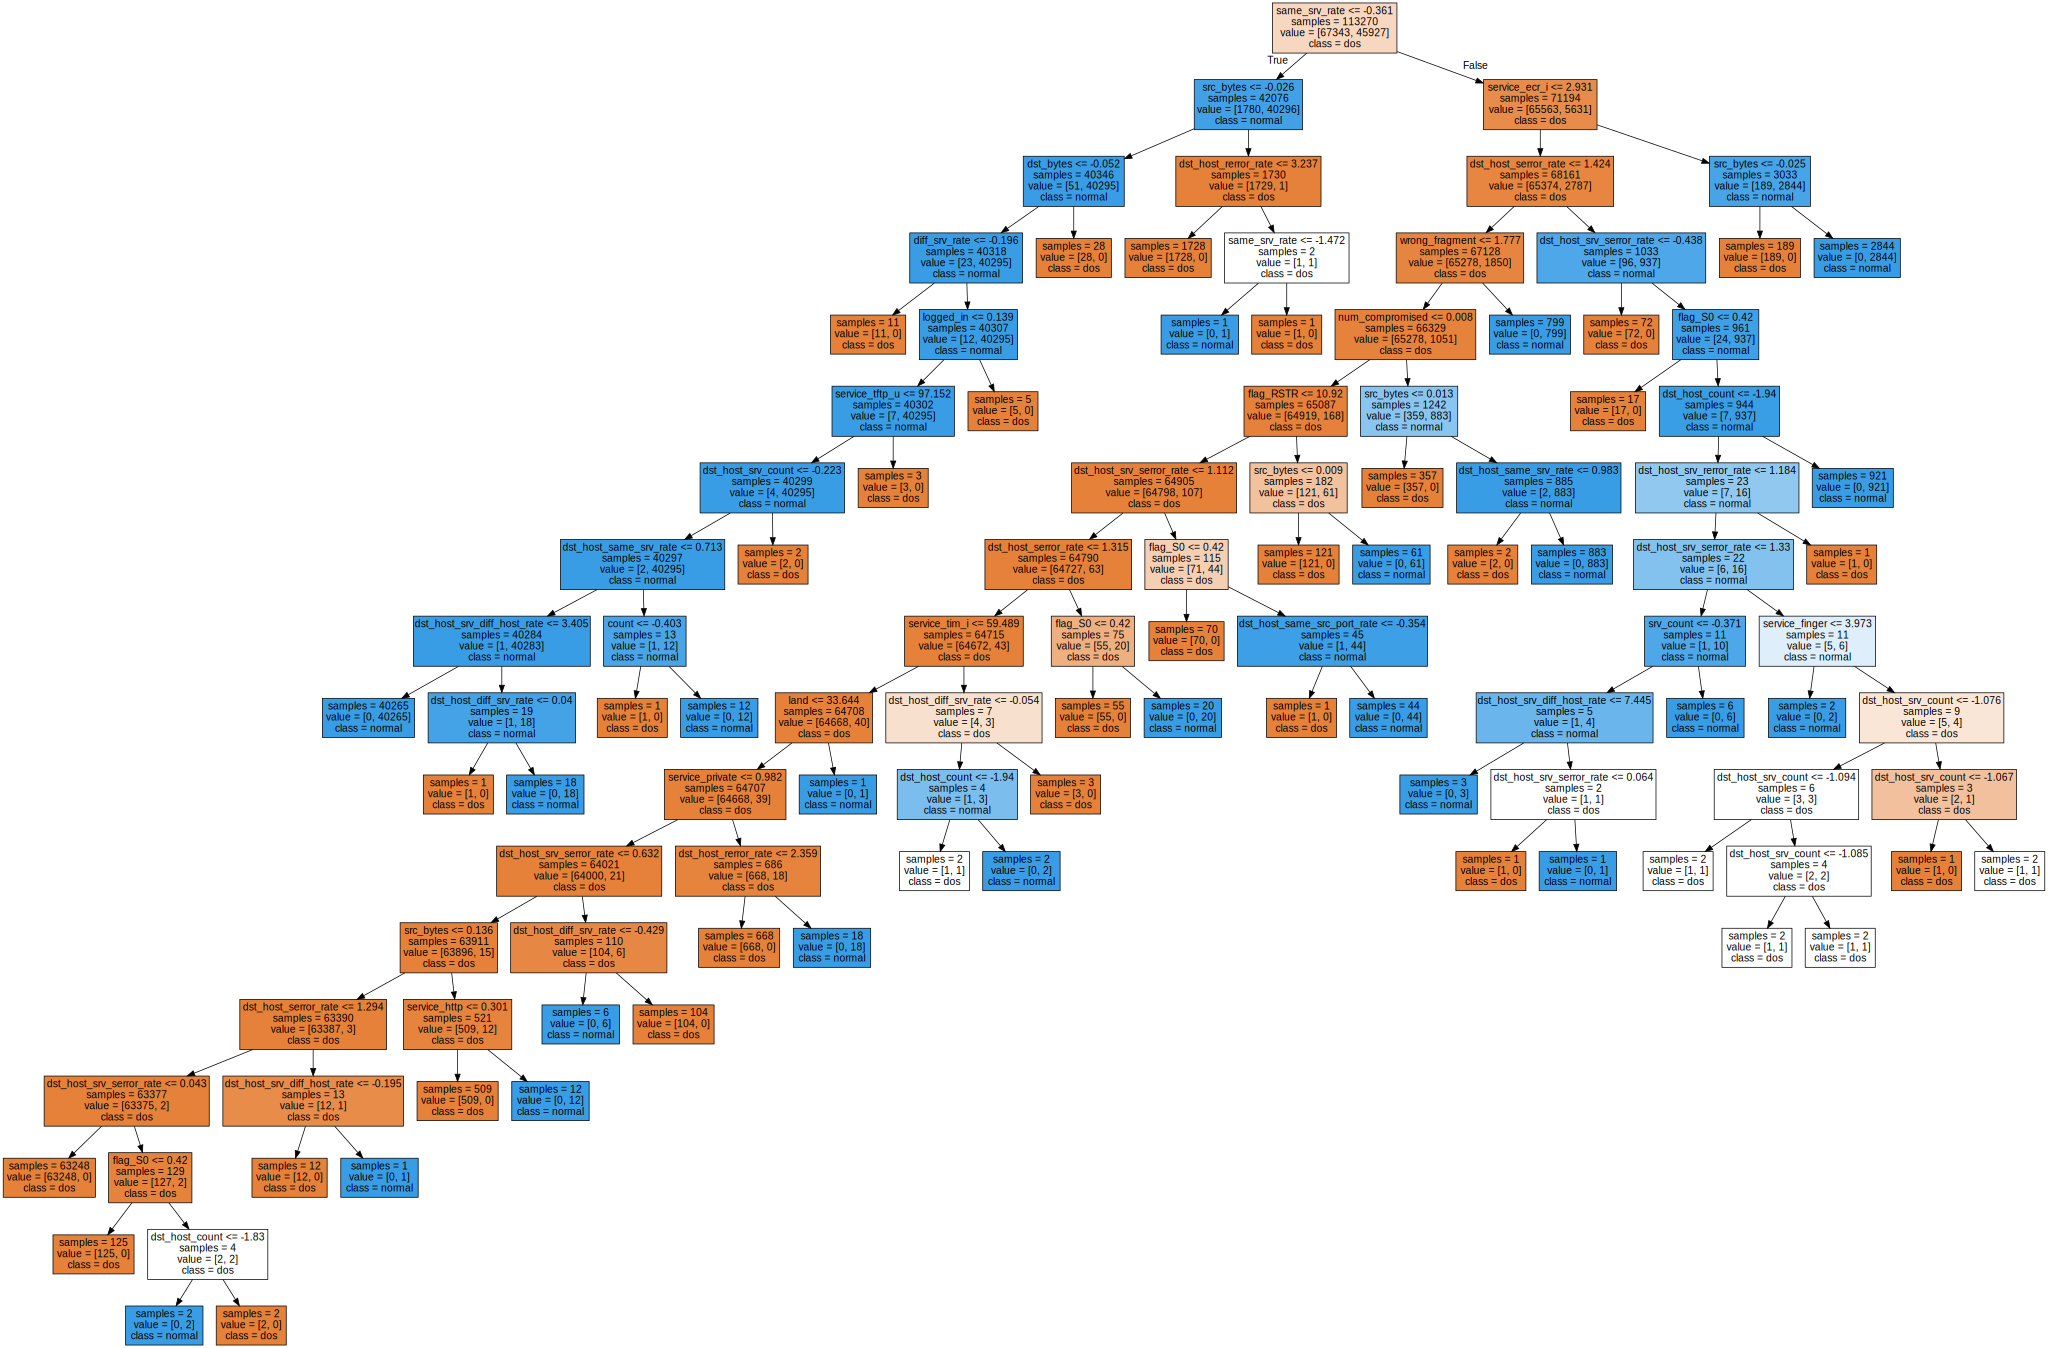

In [79]:
import graphviz
with open("treeDos.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

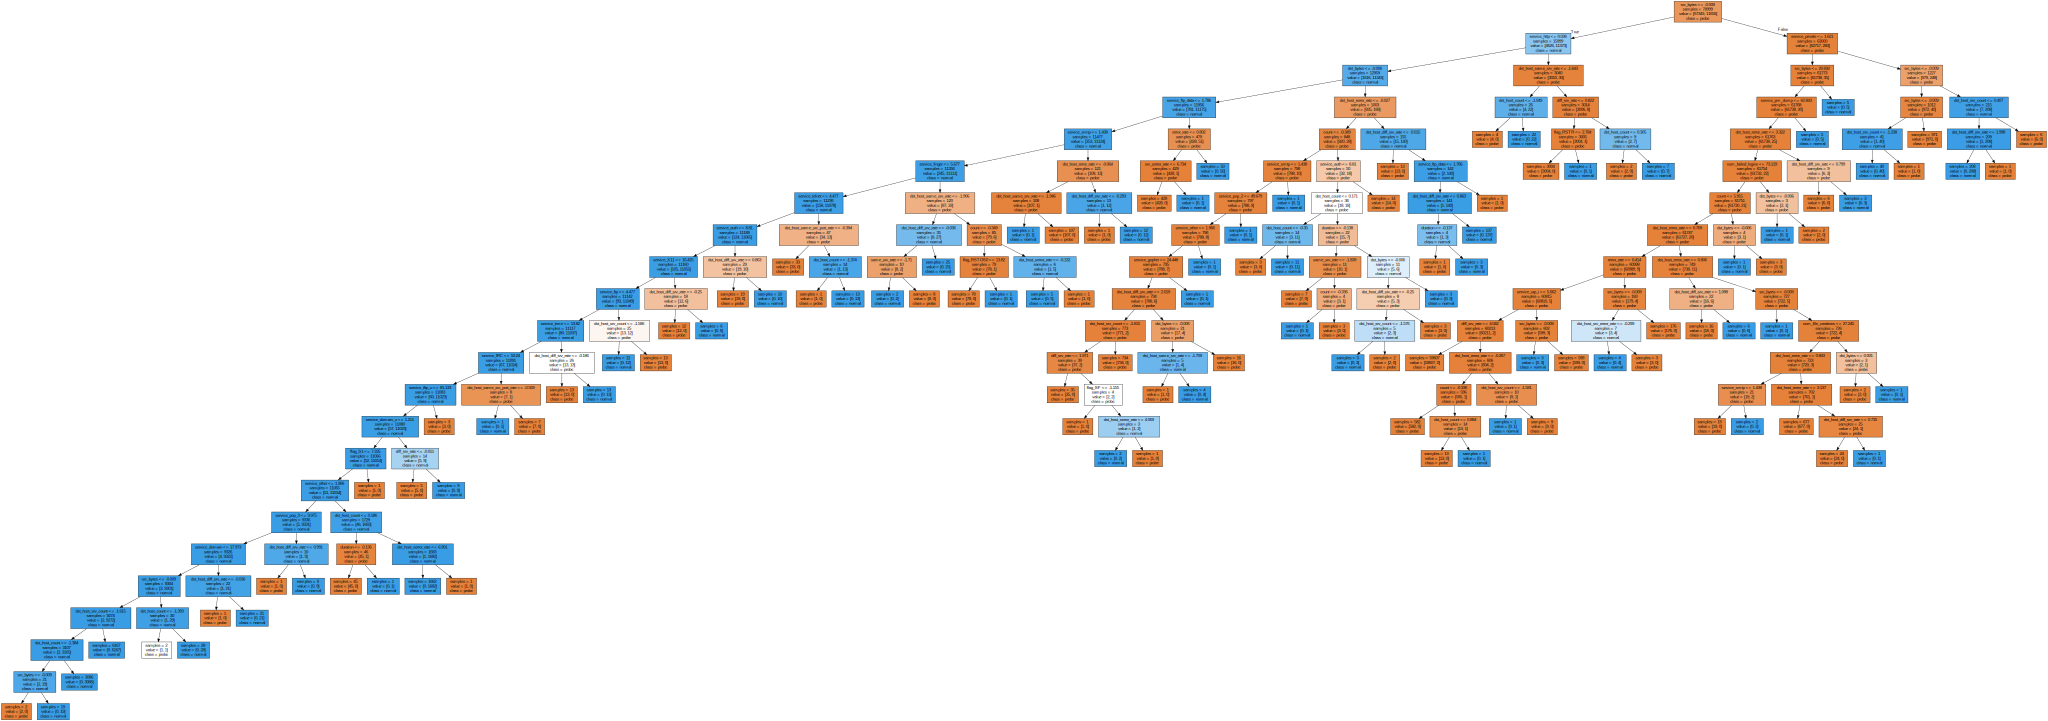

In [80]:
import graphviz
with open("treeProbe.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

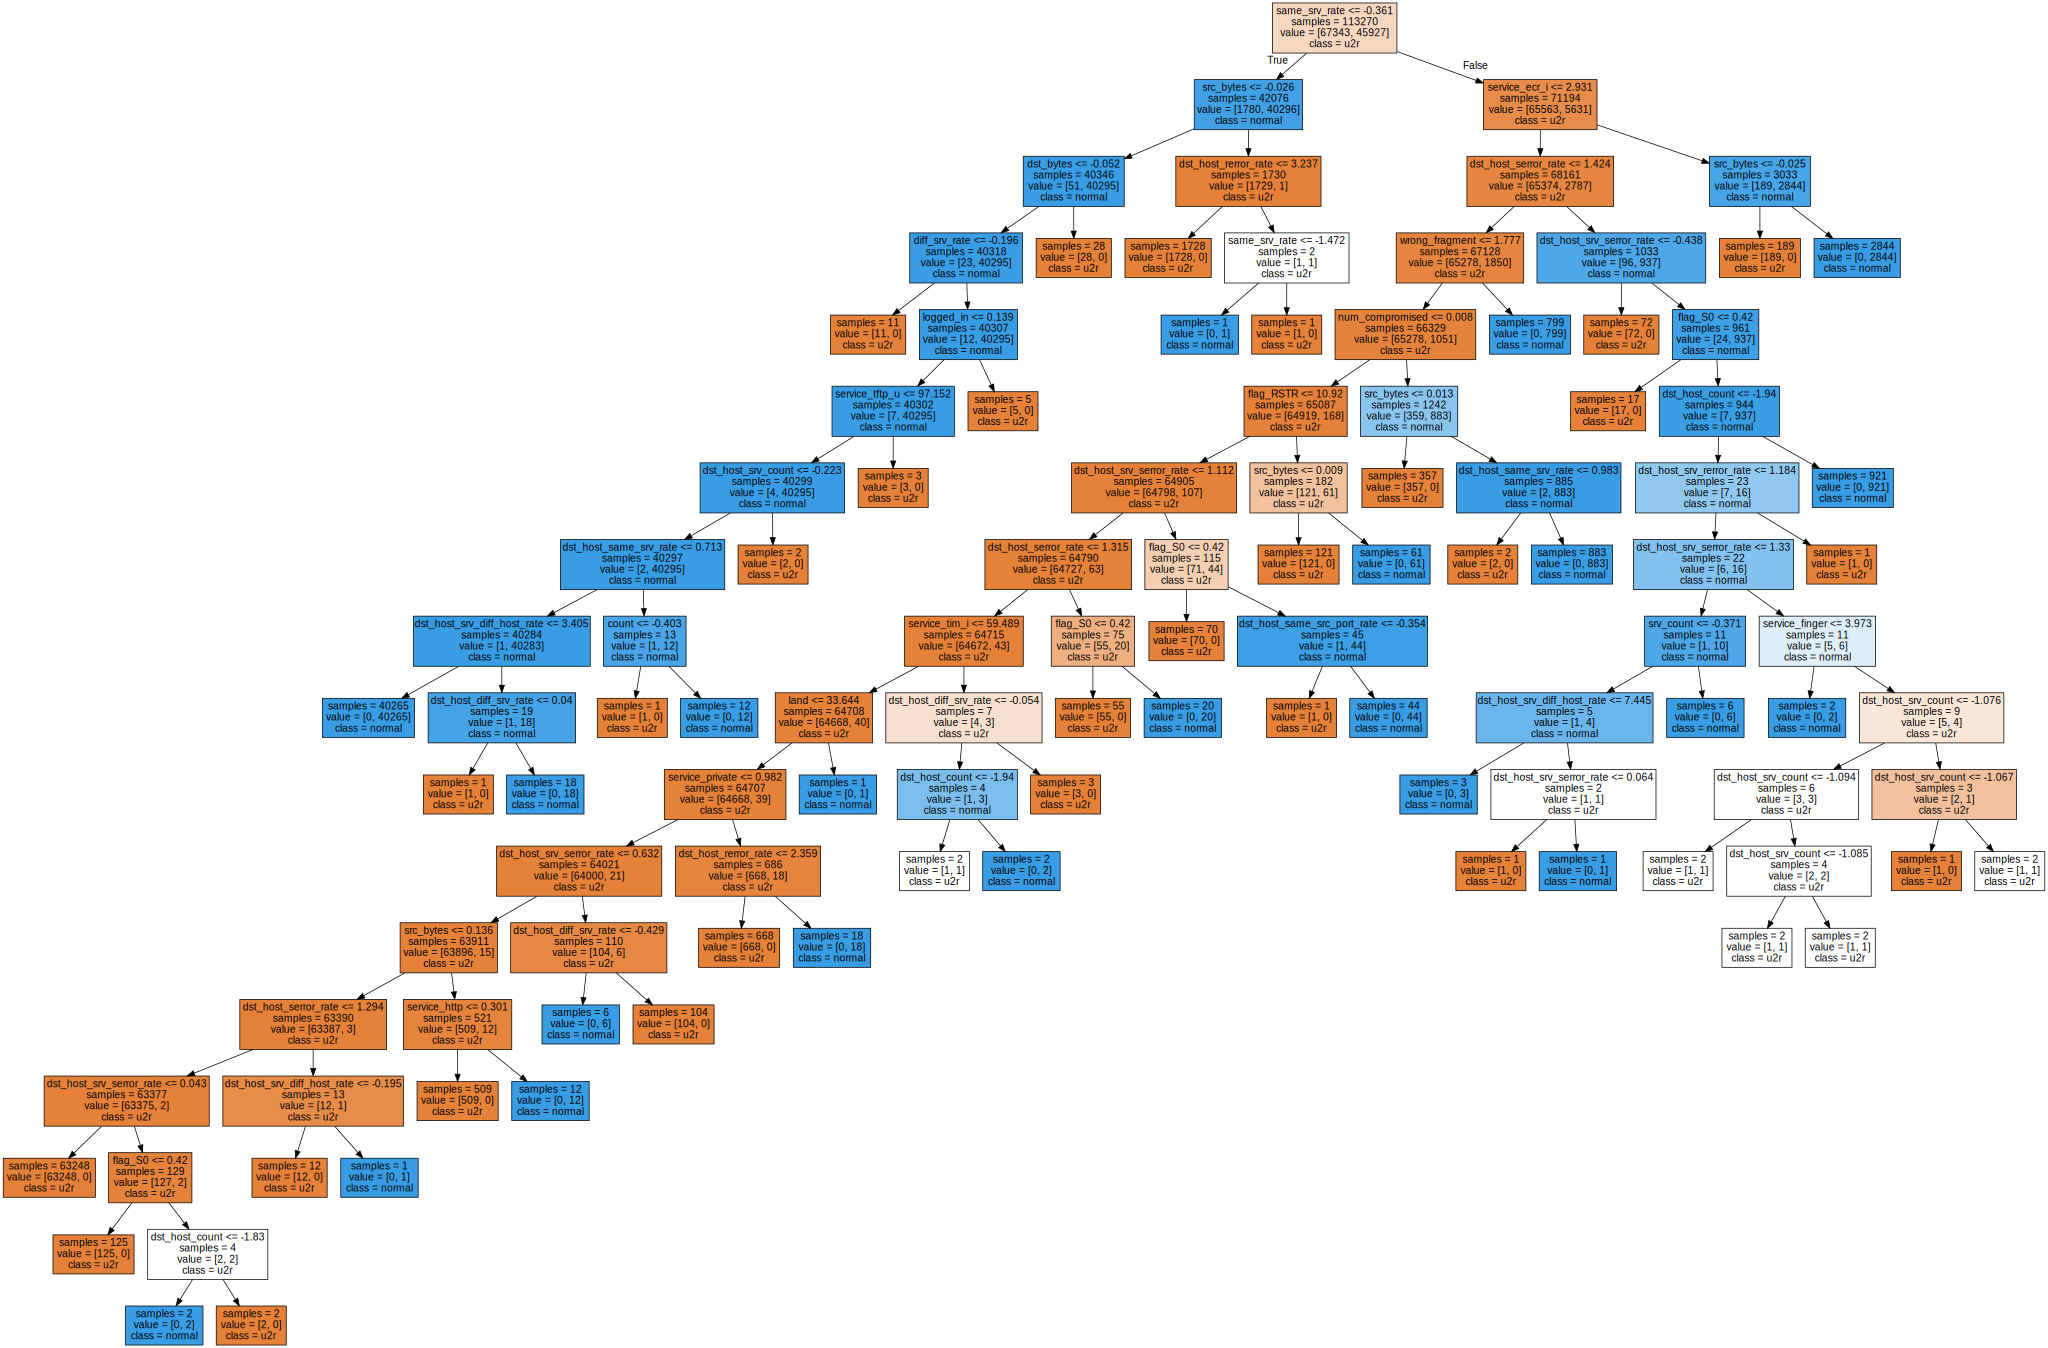

In [81]:
import graphviz
with open("treeU2R.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

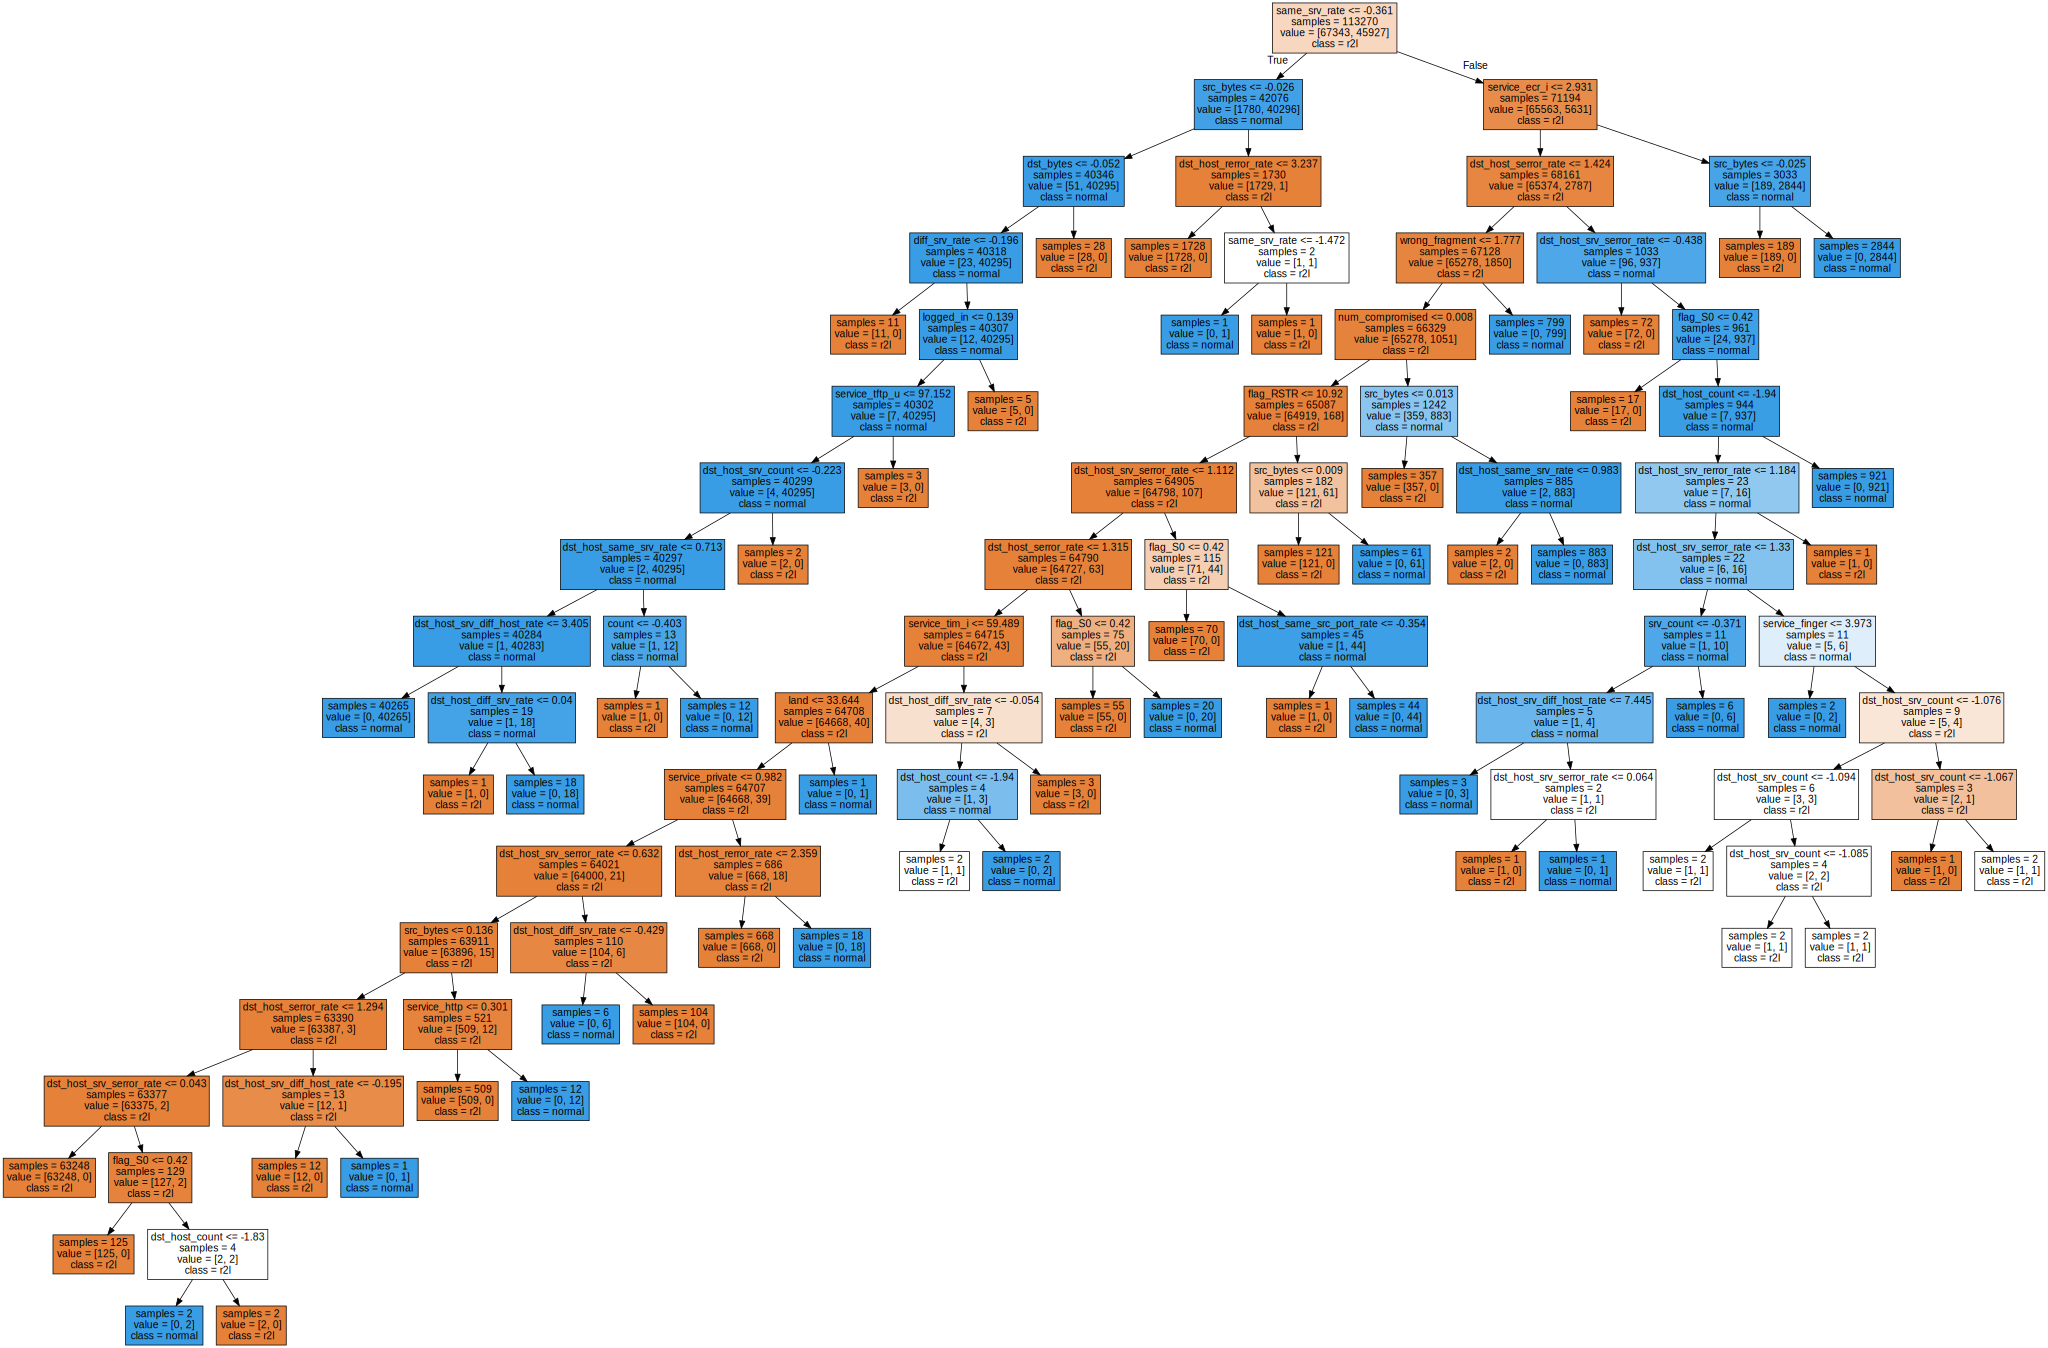

In [82]:
import graphviz
with open("treeR2L.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)

*pour les features selectionées par RFE (13 features):*

# Prédiction et évaluation : utilisation de toutes les features pour chaque catégorie **DecisionTreeClassifier**

pour tout les features :122 

**DOS**

In [83]:
clf_dos.predict(X_dos_test[0:5])

array([1, 1, 0, 0, 0])

In [84]:
# Afficher les probabilités prédites des 5 premières lignes
clf_dos.predict_proba(X_dos_test)[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

**confusion matrix : DOS**

In [85]:
Y_dos_pred=clf_dos.predict(X_dos_test)
# Création du confusion matrix
pd.crosstab(Y_dos_test, Y_dos_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2830,4630


**Confusion Matrices : PROBE**

In [86]:
Y_probe_pred=clf_probe.predict(X_probe_test)
# Create confusion matrix
pd.crosstab(Y_probe_test, Y_probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2337,7374
2,212,2209


**Confusion Matrices : R2L**

In [87]:
Y_r2l_pred=clf_r2l.predict(X_r2l_test)

# Create confusion matrix
pd.crosstab(Y_r2l_test, Y_r2l_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2573,312


**Confusion Matrices : U2R**

In [88]:
Y_u2r_pred=clf_u2r.predict(X_u2r_test)
# Create confusion matrix
pd.crosstab(Y_u2r_test, Y_u2r_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9703,8
4,60,7


**pour les 13 caractéristiques**

In [89]:
# les 13 features
clf_rfe_dos=DecisionTreeClassifier(random_state=0)
clf_rfe_probe=DecisionTreeClassifier(random_state=0)
clf_rfe_r2l=DecisionTreeClassifier(random_state=0)
clf_rfe_u2r=DecisionTreeClassifier(random_state=0)
clf_rfe_dos.fit(X_rfe_dos, Y_dos.astype(int))
clf_rfe_probe.fit(X_rfe_probe, Y_probe.astype(int))
clf_rfe_r2l.fit(X_rfe_r2l, Y_r2l.astype(int))
clf_rfe_u2r.fit(X_rfe_u2r, Y_u2r.astype(int))

DecisionTreeClassifier(random_state=0)

In [90]:
Y_rfe_dos_pred=clf_rfe_dos.predict(X_rfe_dos_test)
# Création du confusion matrix
pd.crosstab(Y_dos_test, Y_dos_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2830,4630


In [91]:
Y_rfe_probe_pred=clf_rfe_probe.predict(X_rfe_probe_test)
# Création du confusion matrix
pd.crosstab(Y_probe_test, Y_rfe_probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8709,1002
2,944,1477


In [92]:
Y_rfe_r2l_pred=clf_rfe_r2l.predict(X_rfe_r2l_test)
# Création du confusion matrix
pd.crosstab(Y_r2l_test, Y_rfe_r2l_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


In [93]:
Y_rfe_u2r_pred=clf_rfe_u2r.predict(X_rfe_u2r_test)
# Création du confusion matrix
pd.crosstab(Y_u2r_test, Y_rfe_u2r_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9706,5
4,52,15


# Cross Validation: Accuracy, Precision, Recall, F-measure du **DecisionTreeClassifier**

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**pour toutes les caractéristiques**

**DOS**

In [215]:
accuracy = cross_val_score(clf_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['DOS' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99639 
Precision: 0.99624
Recall: 0.99642
F-measure: 0.99633


In [216]:
results

defaultdict(list,
            {('DOS', 'DecisionTreeClassifier'): [0.9963892201724451,
              0.9962382922941636,
              0.9964193563722515,
              0.9963267645542528]})

**PROBE**

In [217]:
accuracy = cross_val_score(clf_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['PROBE' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99571
Precision: 0.99392
Recall: 0.99267
F-measure: 0.99329


In [218]:
results

defaultdict(list,
            {('DOS', 'DecisionTreeClassifier'): [0.9963892201724451,
              0.9962382922941636,
              0.9964193563722515,
              0.9963267645542528],
             ('PROBE', 'DecisionTreeClassifier'): [0.9957134475363683,
              0.993915224053054,
              0.9926705006701677,
              0.9932861239030295]})

**R2L**

In [219]:
accuracy = cross_val_score(clf_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['R2L' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.97920
Precision: 0.97151
Recall: 0.96958
F-measure: 0.97051


**U2R**

In [220]:
accuracy = cross_val_score(clf_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['U2R' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99652
Precision: 0.86295
Recall: 0.90958
F-measure: 0.88210


**Pour les 13 features**


**DOS**

In [221]:
accuracy = cross_val_score(clf_rfe_dos, X_rfe_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_rfe_dos, X_rfe_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_rfe_dos, X_rfe_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_rfe_dos, X_rfe_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['DOS' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99738 
Precision: 0.99733
Recall: 0.99734
F-measure: 0.99733


**PROBE**

In [222]:
accuracy = cross_val_score(clf_rfe_probe, X_rfe_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_rfe_probe, X_rfe_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_rfe_probe, X_rfe_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_rfe_probe, X_rfe_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['PROBE' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99085 
Precision: 0.98674
Recall: 0.98467
F-measure: 0.98566


**R2L**

In [223]:
accuracy = cross_val_score(clf_rfe_r2l, X_rfe_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_rfe_r2l, X_rfe_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_rfe_r2l, X_rfe_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_rfe_r2l, X_rfe_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['R2L' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.97459 
Precision: 0.96689
Recall: 0.96086
F-measure: 0.96379


**U2R**

In [224]:
accuracy = cross_val_score(clf_rfe_u2r, X_rfe_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_rfe_u2r, X_rfe_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf_rfe_u2r, X_rfe_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf_rfe_u2r, X_rfe_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['U2R' , 'DecisionTreeClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99652 
Precision: 0.87538
Recall: 0.89540
F-measure: 0.87731


# RFECV for illustration

In [103]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Automatically created module for IPython interactive environment


**DOS**

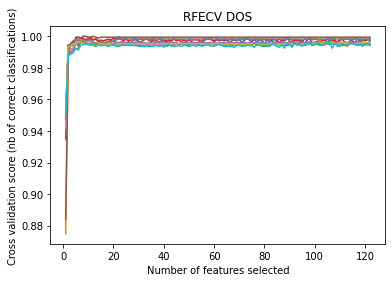

In [104]:
rfecv_dos = RFECV(estimator=clf_dos, step=1, cv=10, scoring='accuracy')
rfecv_dos.fit(X_dos_test, Y_dos_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV DOS')
plt.plot(range(1, len(rfecv_dos.grid_scores_) + 1), rfecv_dos.grid_scores_ )
plt.show()

  **PROBE**

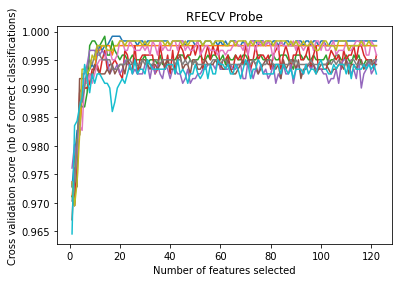

In [105]:
rfecv_probe = RFECV(estimator=clf_probe, step=1, cv=10, scoring='accuracy')
rfecv_probe.fit(X_probe_test, Y_probe_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Probe')
plt.plot(range(1, len(rfecv_probe.grid_scores_) + 1), rfecv_probe.grid_scores_)
plt.show()

**R2L**

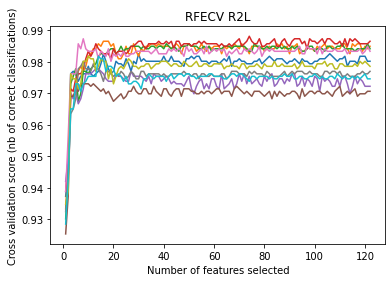

In [106]:
rfecv_r2l = RFECV(estimator=clf_r2l, step=1, cv=10, scoring='accuracy')
rfecv_r2l.fit(X_r2l_test, Y_r2l_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV R2L')
plt.plot(range(1, len(rfecv_r2l.grid_scores_) + 1), rfecv_r2l.grid_scores_)
plt.show()

**U2R**

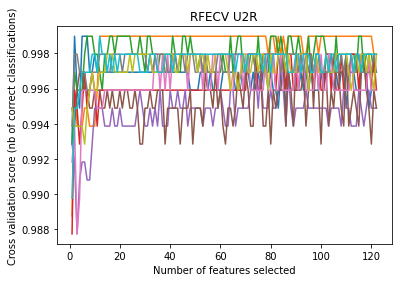

In [107]:
rfecv_u2r = RFECV(estimator=clf_u2r, step=1, cv=10, scoring='accuracy')
rfecv_u2r.fit(X_u2r_test, Y_u2r_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV U2R')
plt.plot(range(1, len(rfecv_u2r.grid_scores_) + 1), rfecv_u2r.grid_scores_)
plt.show()

# Création du model **RandomForestClassifier**

**toutes les caractéristiques**

In [108]:
#all features
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#DOS classifier
clf1_dos=RandomForestClassifier(random_state=0)
#PROBE classifier
clf1_probe=RandomForestClassifier(random_state=0)
#R2L classifier
clf1_r2l=RandomForestClassifier(random_state=0)
#U2R classifier
clf1_u2r=RandomForestClassifier(random_state=0)
#train DOS classifier
clf1_dos.fit(X_dos, Y_dos.astype(int))
#train PROBE classifier
clf1_probe.fit(X_probe, Y_probe.astype(int))
#train R2L classifier
clf1_r2l.fit(X_r2l, Y_r2l.astype(int))
#train U2R classifier
clf1_u2r.fit(X_u2r, Y_u2r.astype(int))

RandomForestClassifier(random_state=0)

# selectioner les caractéristique pour randomforest utilisant RFE avec **RandomForestClassifier**

**Recursive Feature Eliminations**, sélectionnez 13 features chacune sur 122   
obtenez 13 meilleures features sur 122 à partir de RFE

**DOS**

In [109]:
from sklearn.feature_selection import RFE
clf1 = RandomForestClassifier(n_jobs=2, random_state=0)
rfe = RFE(estimator=clf1, n_features_to_select=13, step=1)
rfe.fit(X_dos, Y_dos.astype(int))
X_rfe_dos_RF=rfe.transform(X_dos)
true=rfe.support_
rfecolindex_dos_RF=[i for i, x in enumerate(true) if x]
rfecolname_dos_RF=list(colNames_train[i] for i in rfecolindex_dos_RF)
rfecolname_dos_RF

['src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_ecr_i',
 'flag_S0',
 'flag_SF']

In [110]:
X_rfe_dos_test_RF = X_dos_test[:,rfe.support_]

**PROBE**

In [111]:
rfe.fit(X_probe, Y_probe.astype(int))
X_rfe_probe_RF=rfe.transform(X_probe)
true=rfe.support_
rfecolindex_probe_RF=[i for i, x in enumerate(true) if x]
rfecolname_probe_RF=list(colNames_train[i] for i in rfecolindex_probe_RF)
rfecolname_probe_RF

['src_bytes',
 'dst_bytes',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_tcp',
 'service_eco_i',
 'service_private']

In [112]:
X_rfe_probe_test_RF = X_probe_test[:,rfe.support_]

**R2L**

In [113]:
rfe.fit(X_r2l, Y_r2l.astype(int))
X_rfe_r2l_RF=rfe.transform(X_r2l)
true=rfe.support_
rfecolindex_r2l_RF=[i for i, x in enumerate(true) if x]
rfecolname_r2l_RF=list(colNames_train[i] for i in rfecolindex_r2l_RF)
rfecolname_r2l_RF

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'is_guest_login',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data']

In [114]:
X_rfe_r2l_test_RF = X_r2l_test[:,rfe.support_]

**U2R**

In [115]:
rfe.fit(X_u2r, Y_u2r.astype(int))
X_rfe_u2r_RF=rfe.transform(X_u2r)
true=rfe.support_
rfecolindex_u2r_RF=[i for i, x in enumerate(true) if x]
rfecolname_u2r_RF=list(colNames_train[i] for i in rfecolindex_u2r_RF)
rfecolname_u2r_RF

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'root_shell',
 'num_file_creations',
 'count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'service_ftp_data']

In [116]:
X_rfe_u2r_test_RF = X_u2r_test[:,rfe.support_]

**Build RandomForest for 13 features**

In [117]:
#for 13 features
#DOS classifier
clf1_rfe_dos=RandomForestClassifier(random_state=0)
#PROBE classifier
clf1_rfe_probe=RandomForestClassifier(random_state=0)
#R2L classifier
clf1_rfe_r2l=RandomForestClassifier(random_state=0)
#U2R classifier
clf1_rfe_u2r=RandomForestClassifier(random_state=0)
#train DOS classifer
clf1_rfe_dos.fit(X_rfe_dos_RF, Y_dos.astype(int))
#train PORBE classifier
clf1_rfe_probe.fit(X_rfe_probe_RF, Y_probe.astype(int))
#tarin R2L classifier
clf1_rfe_r2l.fit(X_rfe_r2l_RF, Y_r2l.astype(int))
#Train classifier
clf1_rfe_u2r.fit(X_rfe_u2r_RF, Y_u2r.astype(int))

RandomForestClassifier(random_state=0)

# Prédiction et évaluation : utilisation de toutes les features pour chaque catégorie **RandomForestClassifier**

**pour les 122 caractéristiques :**

**matrice de confusion: DOS**

In [118]:
Y_dos_pred_RF=clf1_dos.predict(X_dos_test)
# Create confusion matrix
pd.crosstab(Y_dos_test,
            Y_dos_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9670,41
1,6654,806


**matrice de confusion : PROBE**

In [119]:
Y_probe_pred_RF=clf1_probe.predict(X_probe_test)
# Create confusion matrix
pd.crosstab(Y_probe_test,
            Y_probe_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9419,292
2,970,1451


**matrice de confusion : R2L**

In [120]:
Y_r2l_pred_RF=clf1_r2l.predict(X_r2l_test)
# Create confusion matrix
pd.crosstab(Y_r2l_test,
            Y_r2l_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


**matrice de confusion : U2R**

In [121]:
Y_u2r_pred_RF=clf1_u2r.predict(X_u2r_test)
# Create confusion matrix
pd.crosstab(Y_u2r_test,
            Y_u2r_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


**pour les 13 caractéristiques :**

**matrice de confusion: DOS**

In [122]:
Y_dos_rfe_pred_RF=clf1_rfe_dos.predict(X_rfe_dos_test_RF)
# Create confusion matrix
pd.crosstab(Y_dos_test,
            Y_dos_rfe_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9659,52
1,7409,51


In [123]:
Y_probe_rfe_pred_RF=clf1_rfe_probe.predict(X_rfe_probe_test_RF)
# Create confusion matrix
pd.crosstab(Y_probe_test,
            Y_probe_rfe_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9346,365
2,1229,1192


In [124]:
Y_r2l_rfe_pred_RF=clf1_rfe_r2l.predict(X_rfe_r2l_test_RF)
# Create confusion matrix
pd.crosstab(Y_r2l_test,
            Y_r2l_rfe_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


In [125]:
Y_u2r_rfe_pred_RF=clf1_rfe_u2r.predict(X_rfe_u2r_test_RF)
# Create confusion matrix
pd.crosstab(Y_u2r_test,
            Y_u2r_rfe_pred_RF,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9710,1
4,60,7


# Cross Validation: Accuracy, Precision, Recall, F-measure du **RandomForestClassifier**

**pour toutes les caractéristiques**

**DOS**

In [225]:
accuracy = cross_val_score(clf1_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf1_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['DOS' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99819 
Precision: 0.99825
Recall: 0.99808
F-measure: 0.99816


**PROBE**

In [226]:
accuracy = cross_val_score(clf1_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf1_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['PROBE' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99670
Precision: 0.99577
Recall: 0.99391
F-measure: 0.99483


**R2L**

In [227]:
accuracy = cross_val_score(clf1_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf1_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['R2L' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.98182
Precision: 0.97544
Recall: 0.97298
F-measure: 0.97419


**U2R**

In [228]:
accuracy = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['U2R' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99795
Precision: 0.96125
Recall: 0.88784
F-measure: 0.91780


**pour les 13 caractéristiques**

**DOS**

In [229]:
accuracy = cross_val_score(clf1_rfe_dos, X_rfe_dos_test_RF, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf1_rfe_dos, X_rfe_dos_test_RF, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_rfe_dos, X_rfe_dos_test_RF, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_rfe_dos, X_rfe_dos_test_RF, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['DOS' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99639 
Precision: 0.99627
Recall: 0.99639
F-measure: 0.99633


**PROBE**

In [230]:
accuracy = cross_val_score(clf1_rfe_probe, X_rfe_probe_test_RF, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf1_rfe_probe, X_rfe_probe_test_RF, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_rfe_probe, X_rfe_probe_test_RF, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_rfe_probe, X_rfe_probe_test_RF, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['PROBE' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99341 
Precision: 0.99092
Recall: 0.98844
F-measure: 0.98965


**R2L**

In [231]:
accuracy = cross_val_score(clf1_rfe_r2l, X_rfe_r2l_test_RF, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf1_rfe_r2l, X_rfe_r2l_test_RF, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_rfe_r2l, X_rfe_r2l_test_RF, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_rfe_r2l, X_rfe_r2l_test_RF, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['R2L' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.97920 
Precision: 0.97342
Recall: 0.96751
F-measure: 0.97038


**U2R**

In [232]:
accuracy = cross_val_score(clf1_rfe_u2r, X_rfe_u2r_test_RF, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf1_rfe_u2r, X_rfe_u2r_test_RF, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_rfe_u2r, X_rfe_u2r_test_RF, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_rfe_u2r, X_rfe_u2r_test_RF, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results_rfe['U2R' , 'RandomForestClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99755 
Precision: 0.96647
Recall: 0.85217
F-measure: 0.89347


# Création du model **KNeighbour Classifier**

**note:**  
 KNeighborsClassifier, en revanche, ne possède pas d'attribut feature_importances_.



**toutes les caractéristiques**

In [187]:
#importer KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# all features
#DOS classifier
clf2_dos=KNeighborsClassifier() #n_neighbors, default=5
#PROBE classifier
clf2_probe=KNeighborsClassifier()
#R2L classifier
clf2_r2l=KNeighborsClassifier()
#U2R classifier
clf2_u2r=KNeighborsClassifier()
#train dos classiier
clf2_dos.fit(X_dos, Y_dos.astype(int))
#train probe classifier
clf2_probe.fit(X_probe, Y_probe.astype(int))
#train r2L classifier
clf2_r2l.fit(X_r2l, Y_r2l.astype(int))
#train u2r classifier
clf2_u2r.fit(X_u2r, Y_u2r.astype(int))

KNeighborsClassifier()

# Prédiction et évaluation : utilisation de toutes les features pour chaque catégorie **KNeighborsClassifier**

**matrice de confusion : DOS**

In [189]:
Y_dos_pred_KN=clf2_dos.predict(X_dos_test)
# Create confusion matrix
pd.crosstab(Y_dos_test,
            Y_dos_pred_KN,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9422,289
1,1573,5887


**matrice de confusion : PROBE**

In [190]:
Y_probe_pred_KN=clf2_probe.predict(X_probe_test)
# Create confusion matrix
pd.crosstab(Y_probe_test,
            Y_probe_pred_KN,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9437,274
2,1272,1149


**matrice de confusion : R2L**

In [191]:
Y_r2l_pred_KN=clf2_r2l.predict(X_r2l_test)
# Create confusion matrix
pd.crosstab(Y_r2l_test,
            Y_r2l_pred_KN,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9706,5
3,2883,2


**matrice de confusion : U2R**

In [192]:
Y_u2r_pred_KN=clf2_u2r.predict(X_u2r_test)
# Create confusion matrix
pd.crosstab(Y_u2r_test,
            Y_u2r_pred_KN,
            rownames=['Actual attacks'],
            colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,65,2


# Cross Validation: Accuracy, Precision, Recall, F-measure du **KNeighborsClassifier**

**DOS**

In [233]:
accuracy = cross_val_score(clf2_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf2_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf2_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf2_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['DOS' , 'KNeighborsClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99715 
Precision: 0.99711
Recall: 0.99709
F-measure: 0.99710


**PROBE**

In [234]:
accuracy = cross_val_score(clf2_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf2_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf2_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf2_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['PROBE' , 'KNeighborsClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99077
Precision: 0.98606
Recall: 0.98508
F-measure: 0.98553


**R2L**

In [235]:
accuracy = cross_val_score(clf2_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf2_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf2_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf2_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['R2L' , 'KNeighborsClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.96705
Precision: 0.95265
Recall: 0.95439
F-measure: 0.95344


In [236]:
accuracy = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f" % (precision.mean()))
recall = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f" % (recall.mean()))
f = cross_val_score(clf1_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f" % (f.mean()))
results['U2R' , 'KNeighborsClassifier'] = [accuracy.mean(), precision.mean() , recall.mean() ,f.mean()]

Accuracy: 0.99795
Precision: 0.96125
Recall: 0.88784
F-measure: 0.91780


#Résultat

**summary of cross validation : all features**

In [291]:
# Results all features
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm", "Attaque",  "Accuracy (%)" , "Precision (%)" , "Recall (%)" ,"F-measure(%)"]
x.add_row([''] +["DOS"]+ [round(results[('DOS', 'DecisionTreeClassifier')][0],4)*100]+[round(results[('DOS', 'DecisionTreeClassifier')][1],4)*100]+[round(results[('DOS', 'DecisionTreeClassifier')][2] , 4)*100] + [round(results[('DOS', 'DecisionTreeClassifier')][3],4)*100])
x.add_row(['DecisionTreeClassifier'] +["PROBE"]+ [round(results[('PROBE', 'DecisionTreeClassifier')][0]*100,2)]+[round(results[('PROBE', 'DecisionTreeClassifier')][1],4)*100]+[round(results[('PROBE', 'DecisionTreeClassifier')][2] , 4)*100] + [round(results[('PROBE', 'DecisionTreeClassifier')][3],4)*100])
x.add_row([''] +["R2L"]+ [round(results[('R2L', 'DecisionTreeClassifier')][0],4)*100]+[round(results[('R2L', 'DecisionTreeClassifier')][1],4)*100]+[round(results[('R2L', 'DecisionTreeClassifier')][2]*100,2)] + [round(results[('R2L', 'DecisionTreeClassifier')][3],4)*100])
x.add_row([''] +["U2R"]+ [round(results[('U2R', 'DecisionTreeClassifier')][0],4)*100]+[round(results[('U2R', 'DecisionTreeClassifier')][1],4)*100]+[round(results[('U2R', 'DecisionTreeClassifier')][2] , 4)*100] + [round(results[('U2R', 'DecisionTreeClassifier')][3],4)*100])
x.add_row(['']+['']+['']+['']+['']+[''])
x.add_row([''] +["DOS"]+ [round(results[('DOS', 'RandomForestClassifier')][0],4)*100]+[round(results[('DOS', 'RandomForestClassifier')][1],4)*100]+[round(results[('DOS', 'RandomForestClassifier')][2] , 4)*100] + [round(results[('DOS', 'RandomForestClassifier')][3],4)*100])
x.add_row(['RandomForestClassifier'] +["PROBE"]+ [round(results[('PROBE', 'RandomForestClassifier')][0],4)*100]+[round(results[('PROBE', 'RandomForestClassifier')][1],4)*100]+[round(results[('PROBE', 'RandomForestClassifier')][2] , 4)*100] + [round(results[('PROBE', 'RandomForestClassifier')][3],4)*100])
x.add_row([''] +["R2L"]+ [round(results[('R2L', 'RandomForestClassifier')][0],4)*100]+[round(results[('R2L', 'RandomForestClassifier')][1],4)*100]+[round(results[('R2L', 'RandomForestClassifier')][2],4)*100] + [round(results[('R2L', 'RandomForestClassifier')][3],4)*100])
x.add_row([''] +["U2R"]+ [round(results[('U2R', 'RandomForestClassifier')][0],4)*100]+[round(results[('U2R', 'RandomForestClassifier')][1]*100,2)]+[round(results[('U2R', 'RandomForestClassifier')][2] , 4)*100] + [round(results[('U2R', 'RandomForestClassifier')][3],4)*100])
x.add_row(['']+['']+['']+['']+['']+[''])
x.add_row([''] +["DOS"]+ [round(results[('DOS', 'KNeighborsClassifier')][0],4)*100]+[round(results[('DOS', 'KNeighborsClassifier')][1],4)*100]+[round(results[('DOS', 'KNeighborsClassifier')][2] , 4)*100] + [round(results[('DOS', 'KNeighborsClassifier')][3],4)*100])
x.add_row(['KNeighborsClassifier'] +["PROBE"]+ [round(results[('PROBE', 'KNeighborsClassifier')][0],4)*100]+[round(results[('PROBE', 'KNeighborsClassifier')][1],4)*100]+[round(results[('PROBE', 'KNeighborsClassifier')][2]*100 , 2)] + [round(results[('PROBE', 'KNeighborsClassifier')][3]*100,2)])
x.add_row([''] +["R2L"]+ [round(results[('R2L', 'KNeighborsClassifier')][0],4)*100]+[round(results[('R2L', 'KNeighborsClassifier')][1],4)*100]+[round(results[('R2L', 'KNeighborsClassifier')][2],4)*100] + [round(results[('R2L', 'KNeighborsClassifier')][3],4)*100])
x.add_row([''] +["U2R"]+ [round(results[('U2R', 'KNeighborsClassifier')][0],4)*100]+[round(results[('U2R', 'KNeighborsClassifier')][1]*100,2)]+[round(results[('U2R', 'KNeighborsClassifier')][2] , 4)*100] + [round(results[('U2R', 'KNeighborsClassifier')][3],4)*100])
print("cross validation for all classifier with all features")
print(x)

cross validation for all classifier with all features
+------------------------+---------+--------------+---------------+------------+--------------+
|       Algorithm        | Attaque | Accuracy (%) | Precision (%) | Recall (%) | F-measure(%) |
+------------------------+---------+--------------+---------------+------------+--------------+
|                        |   DOS   |    99.64     |     99.62     |   99.64    |    99.63     |
| DecisionTreeClassifier |  PROBE  |    99.57     |     99.39     |   99.27    |    99.33     |
|                        |   R2L   |    97.92     |     97.15     |   96.96    |    97.05     |
|                        |   U2R   |    99.65     |      86.3     |   90.96    |    88.21     |
|                        |         |              |               |            |              |
|                        |   DOS   |    99.82     |     99.83     |   99.81    |    99.82     |
| RandomForestClassifier |  PROBE  |    99.67     |     99.58     |   99.39    |  

**summary of cross validation : 13 features**

In [290]:
x = PrettyTable()
x.field_names = ["Algorithm", "Attaque",  "Accuracy (%)" , "Precision (%)" , "Recall (%)" ,"F-measure(%)"]
x.add_row([''] +["DOS"]+ [round(results_rfe[('DOS', 'DecisionTreeClassifier')][0]*100,2)]+[round(results_rfe[('DOS', 'DecisionTreeClassifier')][1]*100,2)]+[round(results_rfe[('DOS', 'DecisionTreeClassifier')][2]*100,2)] + [round(results_rfe[('DOS', 'DecisionTreeClassifier')][3]*100,2)])
x.add_row(['DecisionTreeClassifier'] +["PROBE"]+ [round(results_rfe[('PROBE', 'DecisionTreeClassifier')][0]*100,2)]+[round(results_rfe[('PROBE', 'DecisionTreeClassifier')][1]*100,2)]+[round(results_rfe[('PROBE', 'DecisionTreeClassifier')][2]*100,2)] + [round(results_rfe[('PROBE', 'DecisionTreeClassifier')][3]*100,2)])
x.add_row([''] +["R2L"]+ [round(results_rfe[('R2L', 'DecisionTreeClassifier')][0]*100,2)]+[round(results_rfe[('R2L', 'DecisionTreeClassifier')][1]*100,2)]+[round(results_rfe[('R2L', 'DecisionTreeClassifier')][2]*100,2)] + [round(results_rfe[('R2L', 'DecisionTreeClassifier')][3]*100,2)])
x.add_row([''] +["U2R"]+ [round(results_rfe[('U2R', 'DecisionTreeClassifier')][0]*100,2)]+[round(results_rfe[('U2R', 'DecisionTreeClassifier')][1]*100,2)]+[round(results_rfe[('U2R', 'DecisionTreeClassifier')][2]*100,2)] + [round(results_rfe[('U2R', 'DecisionTreeClassifier')][3]*100,2)])
x.add_row(['']+['']+['']+['']+['']+[''])
x.add_row([''] +["DOS"]+ [round(results_rfe[('DOS', 'RandomForestClassifier')][0]*100,2)]+[round(results_rfe[('DOS', 'RandomForestClassifier')][1]*100,2)]+[round(results_rfe[('DOS', 'RandomForestClassifier')][2] *100,2)] + [round(results_rfe[('DOS', 'RandomForestClassifier')][3]*100,2)])
x.add_row(['RandomForestClassifier'] +["PROBE"]+ [round(results_rfe[('PROBE', 'RandomForestClassifier')][0]*100,2)]+[round(results_rfe[('PROBE', 'RandomForestClassifier')][1]*100,2)]+[round(results_rfe[('PROBE', 'RandomForestClassifier')][2]*100,2)] + [round(results_rfe[('PROBE', 'RandomForestClassifier')][3]*100,2)])
x.add_row([''] +["R2L"]+ [round(results_rfe[('R2L', 'RandomForestClassifier')][0]*100,2)]+[round(results_rfe[('R2L', 'RandomForestClassifier')][1]*100,2)]+[round(results_rfe[('R2L', 'RandomForestClassifier')][2]*100,2)] + [round(results_rfe[('R2L', 'RandomForestClassifier')][3]*100,2)])
x.add_row([''] +["U2R"]+ [round(results_rfe[('U2R', 'RandomForestClassifier')][0]*100,2)]+[round(results_rfe[('U2R', 'RandomForestClassifier')][1]*100,2)]+[round(results_rfe[('U2R', 'RandomForestClassifier')][2] *100,2)] + [round(results_rfe[('U2R', 'RandomForestClassifier')][3]*100,2)])
print("cross validation for all classifier with 13 features")
print(x)

cross validation for all classifier with 13 features
+------------------------+---------+--------------+---------------+------------+--------------+
|       Algorithm        | Attaque | Accuracy (%) | Precision (%) | Recall (%) | F-measure(%) |
+------------------------+---------+--------------+---------------+------------+--------------+
|                        |   DOS   |    99.74     |     99.73     |   99.73    |    99.73     |
| DecisionTreeClassifier |  PROBE  |    99.09     |     98.67     |   98.47    |    98.57     |
|                        |   R2L   |    97.46     |     96.69     |   96.09    |    96.38     |
|                        |   U2R   |    99.65     |     87.54     |   89.54    |    87.73     |
|                        |         |              |               |            |              |
|                        |   DOS   |    99.64     |     99.63     |   99.64    |    99.63     |
| RandomForestClassifier |  PROBE  |    99.34     |     99.09     |   98.84    |   